In [1]:
import sys

sys.path.insert(1, 'BA_Optimization_ML/Optimization/helper_functions')
import splitcurve as spt_Curve     #for spitting Curves in equal segments
import input_drawing_track as inp_Track
import plot_track as plt_Track
import BA_Optimization_ML.Optimization.VehicleModel.two_track_model as model2


#Import setup file
from getconfig import getConfig
c=getConfig()
print(c)
#-------------------------------
import numpy as np
import matplotlib.pyplot as plt
import importlib

[[1000.0, 1.5, 1.5, 200.0, 150000.0, 40000.0, 0.5], [20.0, 10.0], [0.1, '4g', -90.0, 90.0], [0.1, 'Newton']]


# Input a Trajectory as a Drawing from a canvas

1. Draw in a canvas -> every point gets appendet to a Matrix of (x,y)tuple so that you get a ruth track
To get a smooth model of the Trajectory i use polynomial Regession to fit a curve to the x and y Coordinate
 - The Polynomial degree can be specifide in a ```setup.ini``` file

2. Convert the Trajectory back to a 3 dimentional array
    - with the function ```splitcurve.py``` a array is created with point which are equaly spaced
    - the 3 dimention is the phi Value (the angle __(rad)__ of the tangent line at this point in the curve)

In [2]:
# Get the Track and save it as a csv
s=inp_Track.get_as_csv(steps=int(c[1][0]),save=True,name='ShowTrack')

Accuracy List x  : 0.9996325923493645
Accuracy List y  : 0.9967089482404508

Coefficient X:
 [ 0.00000000e+00 -6.46405364e+02  9.30379104e+03 -8.51497543e+04
  4.39784651e+05 -1.29490129e+06  2.37137432e+06 -2.78078742e+06
  2.02939912e+06 -8.36325525e+05  1.48165620e+05] 
--------
Coefficient Y:
 [ 0.00000000e+00 -1.56659790e+03  3.81032851e+04 -5.02421486e+05
  3.31302570e+06 -1.23927092e+07  2.78836733e+07 -3.84138554e+07
  3.17157258e+07 -1.44145024e+07  2.77442585e+06]
equallity befor:  1.3567339459960892
equallity after:  0.47489281087611207


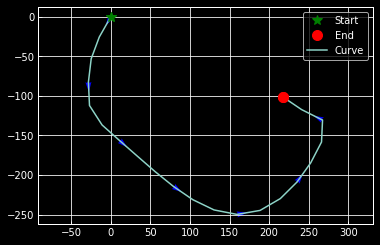

In [3]:
plt_Track.plot_racetrack(s)
importlib.reload(plt_Track)
plt_Track.plot_velocity(s,stepssize=3)

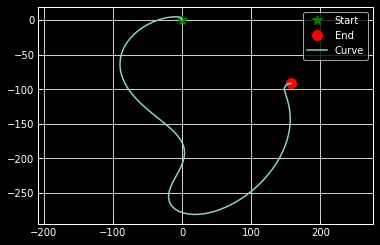

In [36]:
importlib.reload(plt_Track)
plt_Track.plot_racetrack_form_csv(name="ShowTrack.csv")

# Vehicle Model (two track model)
The model is from this matlab repository [https://www.mathworks.com/help/ident/examples/modeling-a-vehicle-dynamics-system.html#d117e1146]

State Parameters:

States                ||  Info
  -----               |----| ----
- x1(t) = v_x(t)      |----|     Longitudinal velocity *m/s*.
- x2(t) = v_y(t)      |----|     Lateral velocity *m/s*.
- x3(t) = r(t)        |----|     Yaw rate *rad/s*.
- x4(t) = phi(t)      |----|     Angel *rad*.
- x5(t) = x(t)        |----|     X-Positon *m*.
- x6(t) = y(t)        |----|   Y-Positon *m*.

Control Parameters:

Controls                ||  Info
  -----               |----| ----
- u1(t) = s_FL(t)     |----| Slip of Front Left tire *ratio*.
- u2(t) = s_FR(t)     |----| Slip of Front Right tire *ratio*.
- u3(t) = s_RL(t)     |----| Slip of Rear Left tire *ratio*.
- u4(t) = s_RR(t)     |----| Slip of Rear Right tire *ratio*.
- u5(t) = delta(t)    |----| Steering angle *rad*.


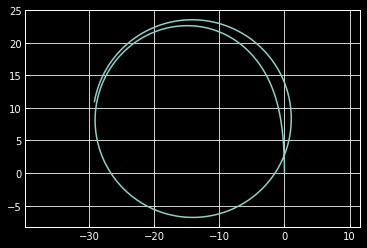

In [5]:
importlib.reload(model2)
x=[
    30,
    0,
    0,
    np.pi/2,
    0,
    0
]

x=np.reshape(x,[-1,1])
X=np.array(x)
X=np.reshape(X,[-1,1])

u=np.array([
    0,
    0,
    0,
    0,
    np.pi/16
])
u=np.reshape(u,[-1,1])

for i in range(1000):
    
    dx=model2.get_dot_states_two_track_model(x,c[0],u)
    #print(x,"\n\n dX:",dx,"\n")
    x=model2.get_next_states_two_track_model(x,dx,0.01)
    X=np.hstack((X,x))
    

#print(X)

plt.figure()
plt.plot(X[4,:],X[5,:])
a=plt.axis("equal")

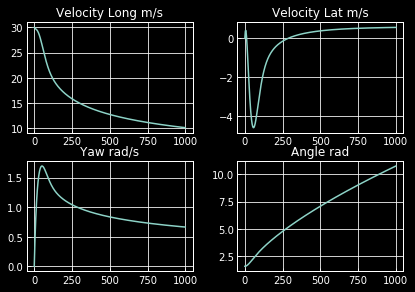

In [6]:
fig,ax =plt.subplots(2,2)
fig.tight_layout()
ax[0][0].plot(range(len(X[0,:])),X[0,:])
ax[0][0].set_title("Velocity Long m/s")

ax[0][1].plot(range(len(X[0,:])),X[1,:])
ax[0][1].set_title("Velocity Lat m/s")

ax[1][0].plot(range(len(X[0,:])),X[2,:])
ax[1][0].set_title("Yaw rad/s")

ax[1][1].plot(range(len(X[0,:])),X[3,:])
b=ax[1][1].set_title("Angle rad")